In [3]:
import json

# Load English articles
with open('Combined_QnA_eng_India_election_2024.json', 'r', encoding='utf-8') as f:
    english_articles = json.load(f)

# Load Hindi articles
with open('Combined_QnA_hin_India_election_2024.json', 'r', encoding='utf-8') as f:
    hindi_articles = json.load(f)

In [35]:
import pandas as pd

def compare_articles(english_article, hindi_article):
    matches = 0
    total_questions = len(english_article['QnA'])
    
    for eng_qna, hin_qna in zip(english_article['QnA'], hindi_article['QnA']):
        if eng_qna['post_LLM_answer'] == hin_qna['post_LLM_answer']:
            matches += 1
    
    return matches, total_questions

matching_pairs = []

for eng_article in english_articles:
    for hin_article in hindi_articles:
        matches, total_questions = compare_articles(eng_article, hin_article)
        match_percentage = (matches / total_questions) * 100
        matching_pairs.append(match_percentage)

# Count the number of pairs for each match percentage
match_counts = pd.Series(matching_pairs).value_counts().sort_index()



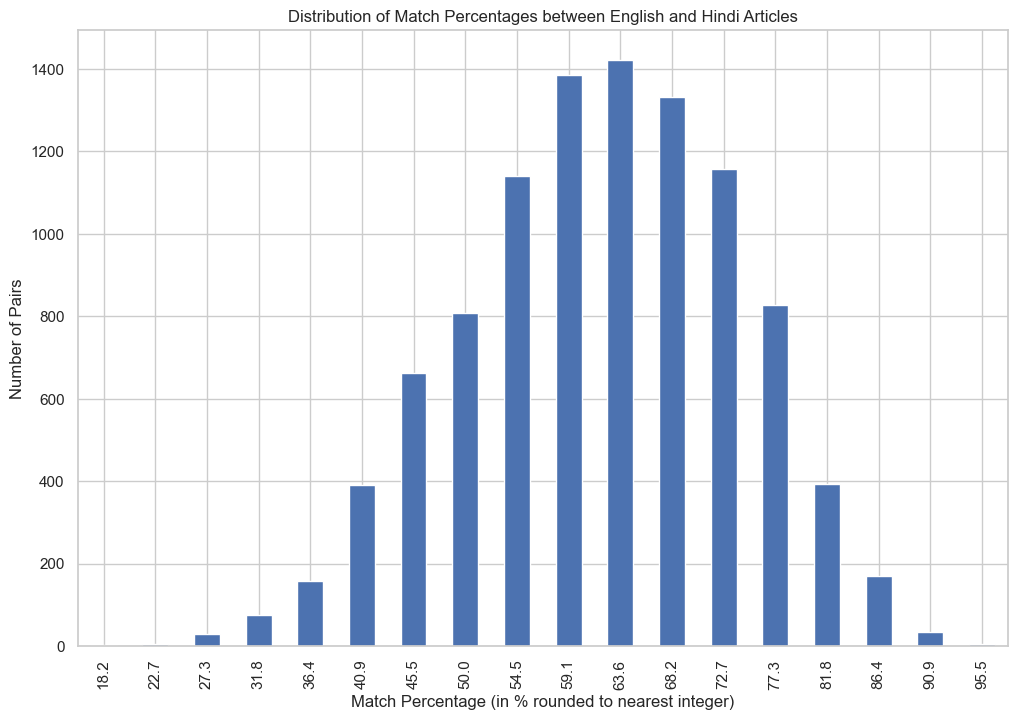

In [36]:
import matplotlib.pyplot as plt
match_counts.index = match_counts.index.round(1)
# Create a bar plot for match percentages
plt.figure(figsize=(12, 8))
match_counts.plot(kind='bar')
plt.xlabel('Match Percentage (in % rounded to nearest integer)')
plt.ylabel('Number of Pairs')
plt.title('Distribution of Match Percentages between English and Hindi Articles')
plt.show()


In [38]:
import numpy as np
# Calculate statistics
index_series = pd.Series(match_counts.index)
total_pairs = match_counts.sum()
mean_percentage = index_series.mean()
median_percentage = index_series.median()
min_percentage = index_series.min()
max_percentage = index_series.max()

# Print statistics
print(f'Total Number of Matching Pairs: {total_pairs}')
print(f'Mean Percentage: {mean_percentage:.1f}')
print(f'Median Percentage: {median_percentage:.1f}')
print(f'Minimum Percentage: {min_percentage:.1f}')
print(f'Maximum Percentage: {max_percentage:.1f}')

Total Number of Matching Pairs: 10000
Mean Percentage: 56.8
Median Percentage: 56.8
Minimum Percentage: 18.2
Maximum Percentage: 95.5


In [24]:
#Calulate mean, median, max, min, and standard deviation of match percentages
mean = match_counts.mean()
median = match_counts.median()
max_match = match_counts.idxmax()
min_match = match_counts.idxmin()
std_dev = match_counts.std()

print(f'Mean: {mean:.2f}')
print(f'Median: {median:.2f}')
print(f'Max Match: {max_match:.2f}')
print(f'Min Match: {min_match:.2f}')
print(f'Standard Deviation: {std_dev:.2f}')


Mean: 555.56
Median: 392.00
Max Match: 63.64
Min Match: 18.18
Standard Deviation: 539.45


In [11]:
from collections import defaultdict
import pandas as pd

# Initialize a dictionary to store the counts
data = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

# Process English articles
for article in english_articles:
    for qna in article['QnA']:
        question = qna['Question']
        answer = qna['post_LLM_answer']
        data[question]['English'][answer] += 1

# Process Hindi articles
for article in hindi_articles:
    for qna in article['QnA']:
        question = qna['Question']
        answer = qna['post_LLM_answer']
        data[question]['Hindi'][answer] += 1

# Convert to DataFrame for easier plotting
records = []
for question, lang_data in data.items():
    for lang, answers in lang_data.items():
        for answer, count in answers.items():
            records.append((question, lang, answer, count))

df = pd.DataFrame(records, columns=['Question', 'Language', 'Answer', 'Count'])

/var/folders/rt/wydyk1yn1096_jp1cjy1506m0000gn/T/ipykernel_30586/633493340.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Question', y='Count', hue='Language', data=df, palette='muted', ci=None)


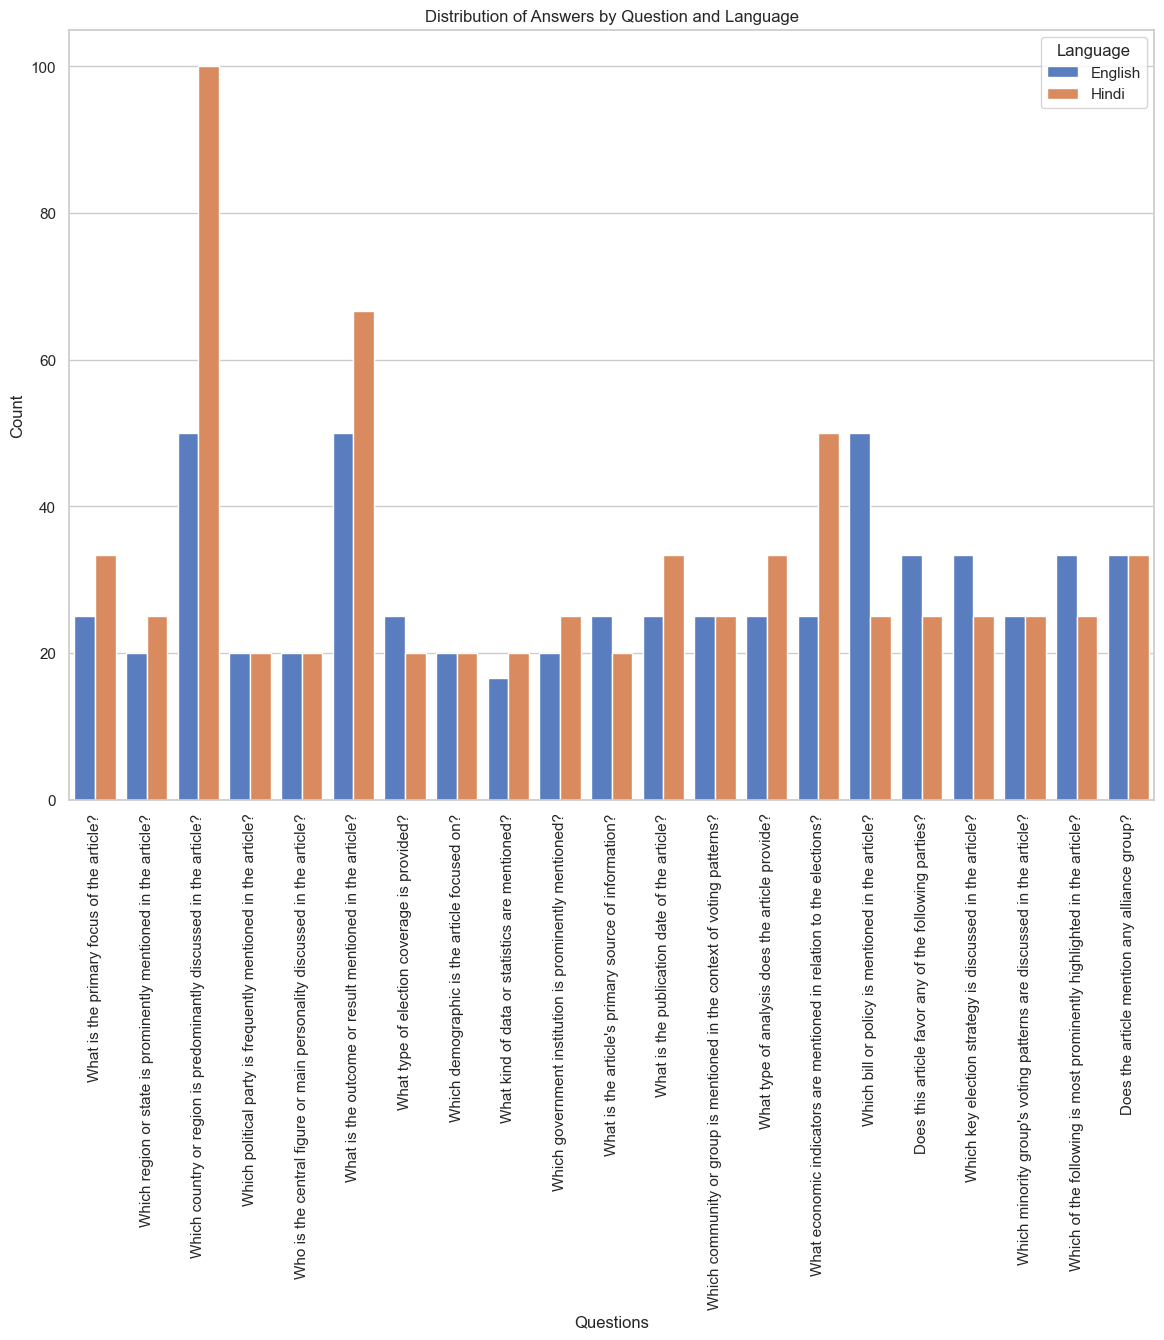

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 10))
sns.barplot(x='Question', y='Count', hue='Language', data=df, palette='muted', ci=None)

# Add titles and labels
plt.title('Distribution of Answers by Question and Language')
plt.xlabel('Questions')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Language')

# Show the plot
plt.show()


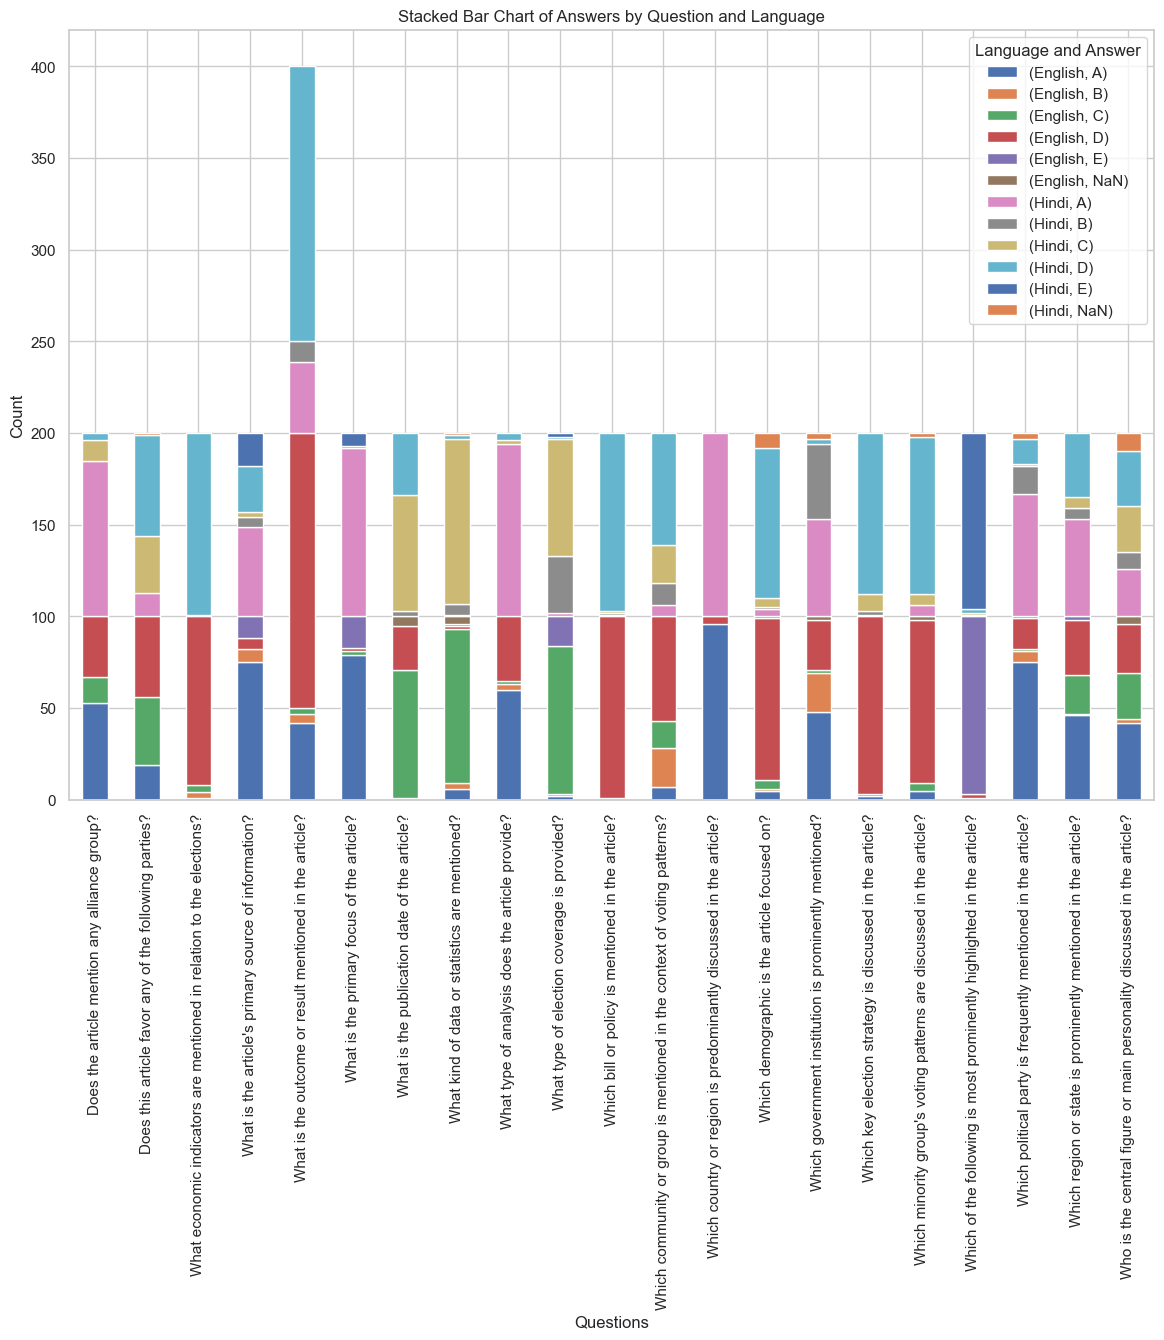

In [13]:
import matplotlib.pyplot as plt

# Create a pivot table for easier plotting
pivot_df = df.pivot_table(index='Question', columns=['Language', 'Answer'], values='Count', aggfunc='sum', fill_value=0)

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Stacked Bar Chart of Answers by Question and Language')
plt.xlabel('Questions')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Language and Answer')
plt.show()


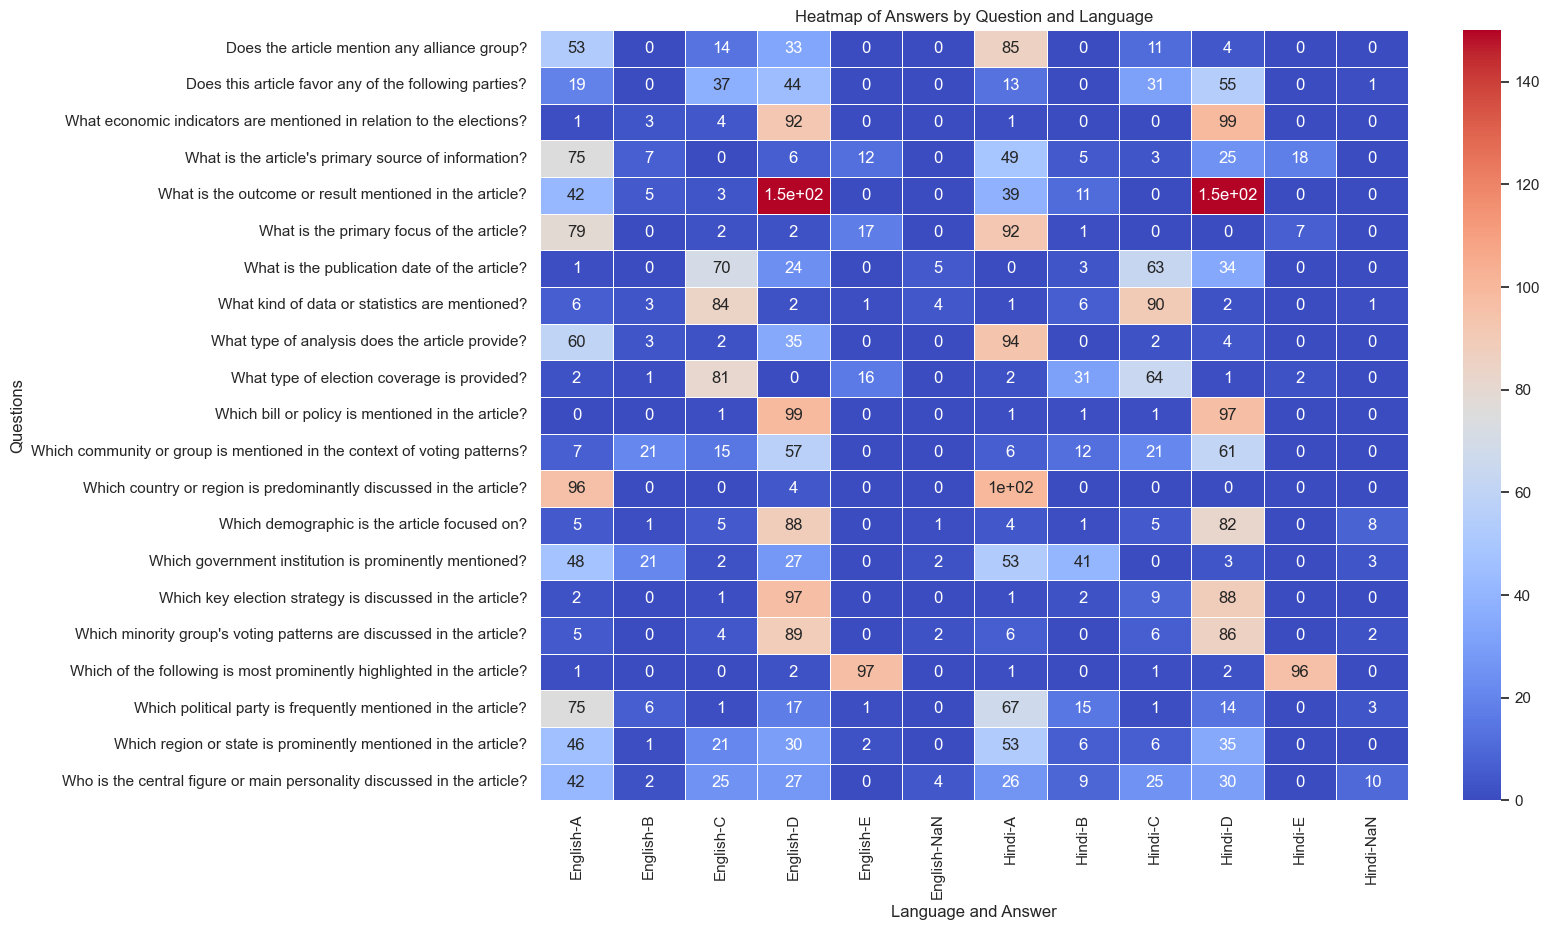

In [14]:
import seaborn as sns

# Create a heatmap of the counts
heatmap_data = df.pivot_table(index='Question', columns=['Language', 'Answer'], values='Count', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Answers by Question and Language')
plt.xlabel('Language and Answer')
plt.ylabel('Questions')
plt.xticks(rotation=90)
plt.show()


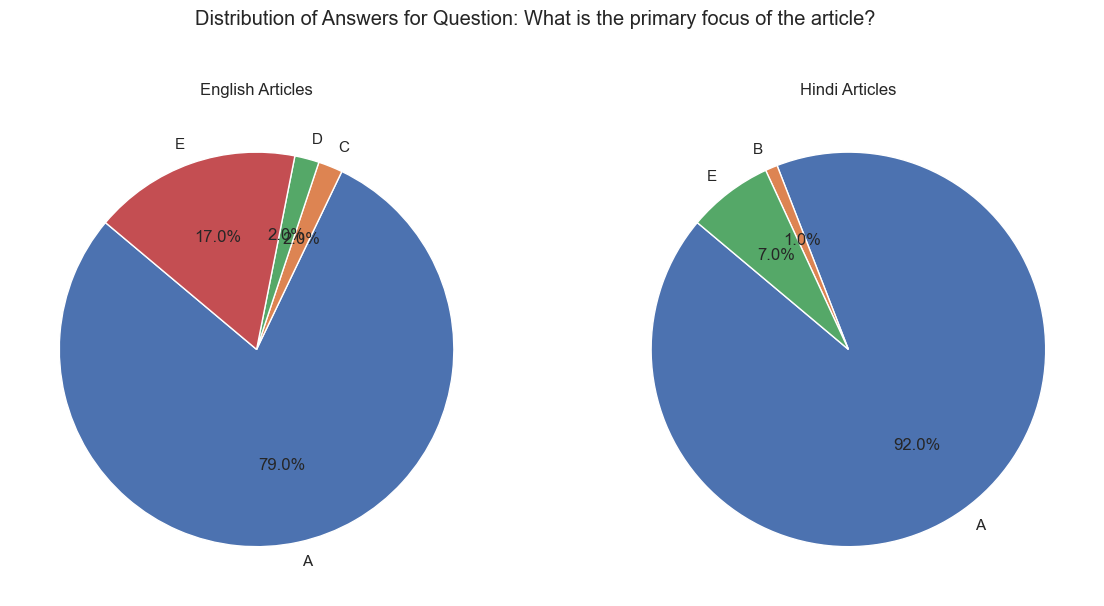

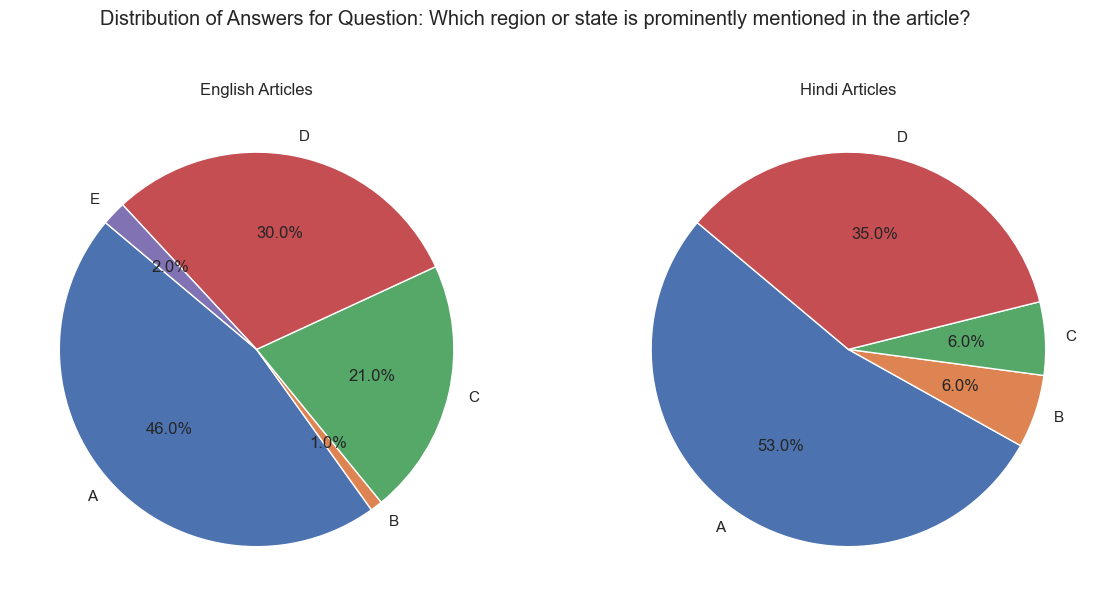

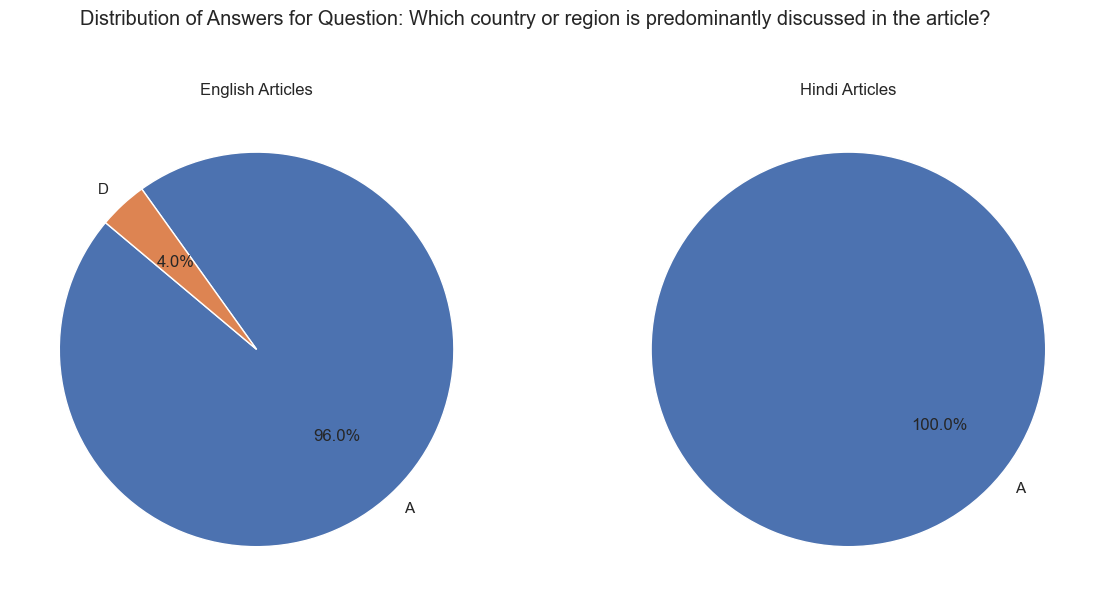

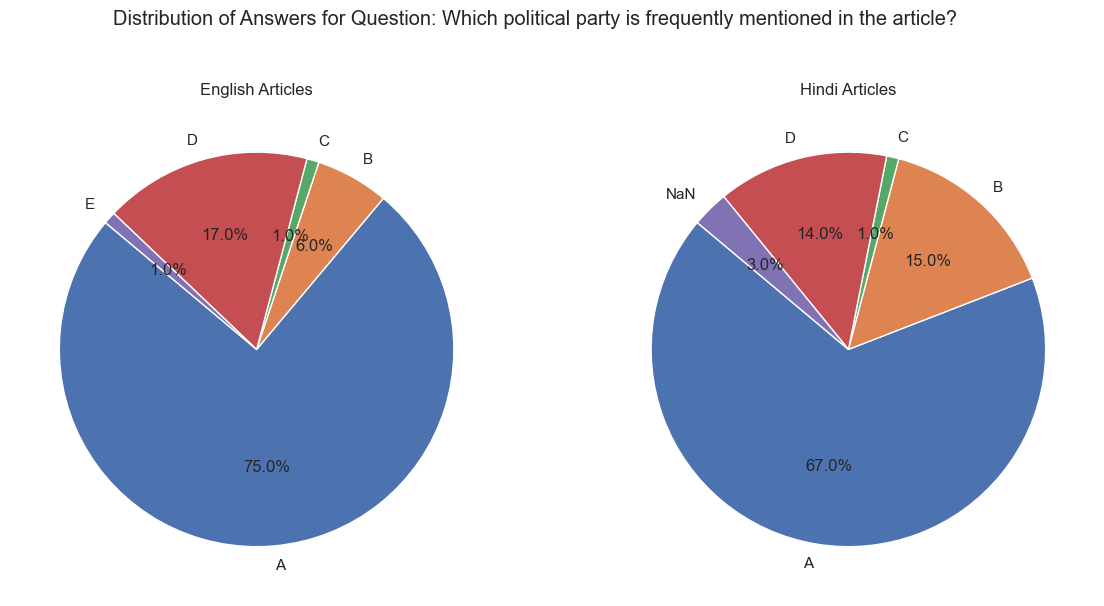

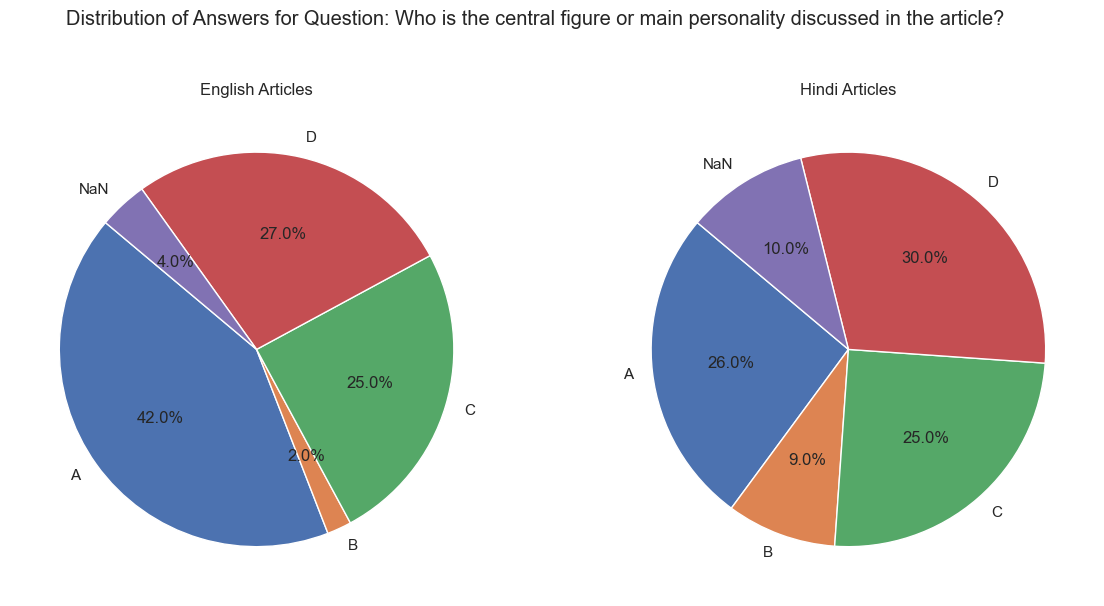

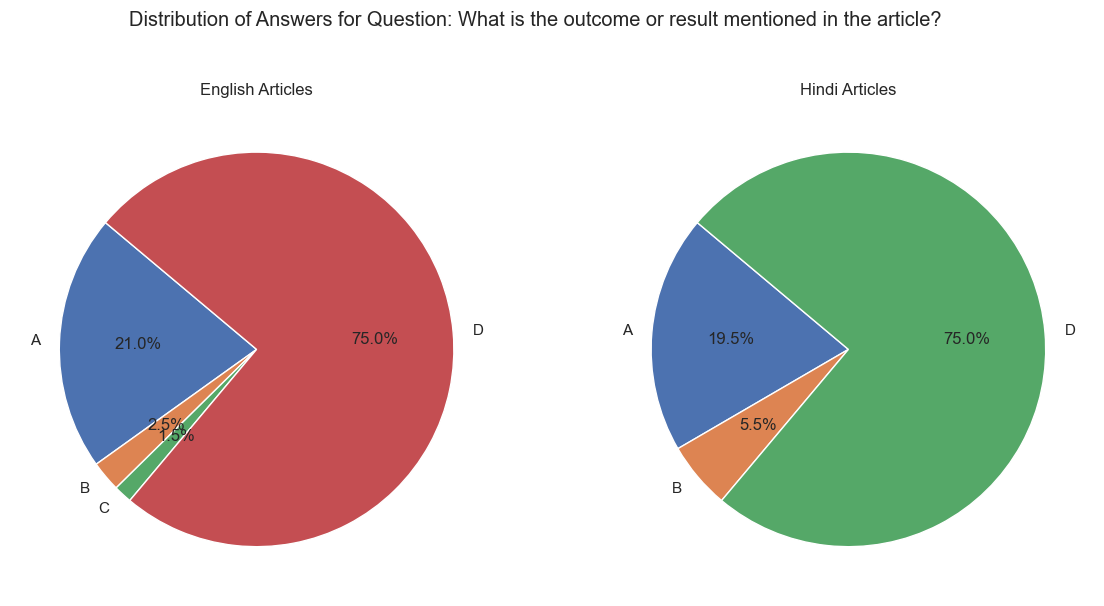

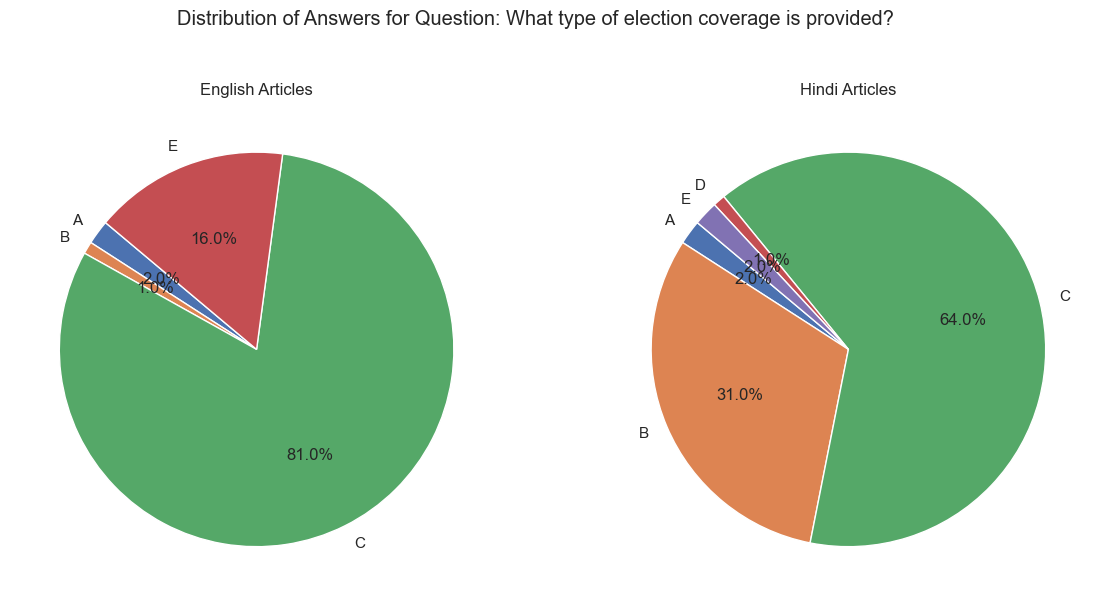

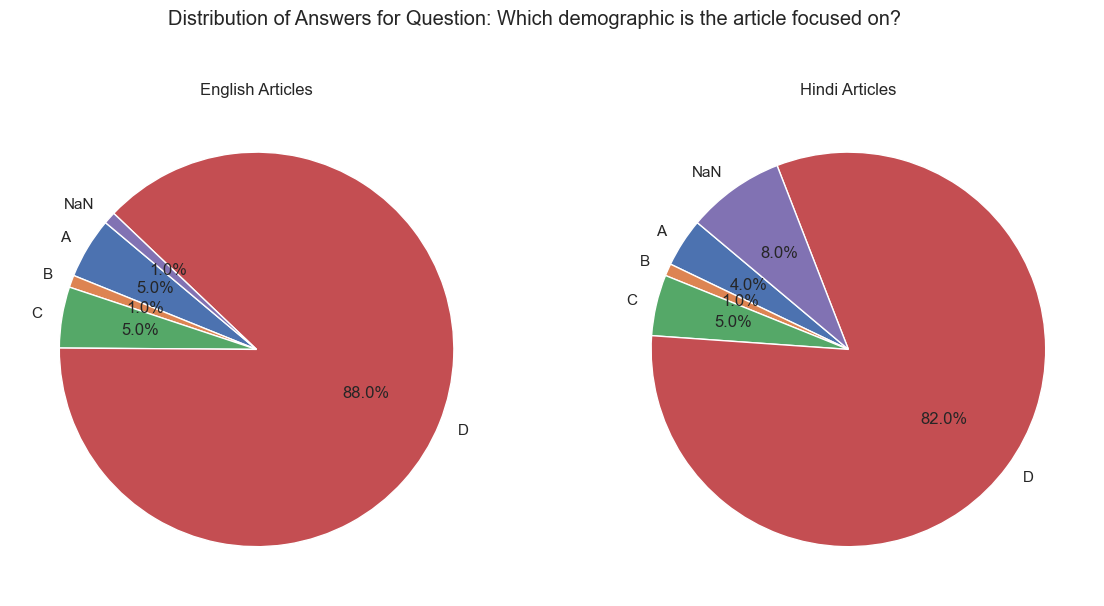

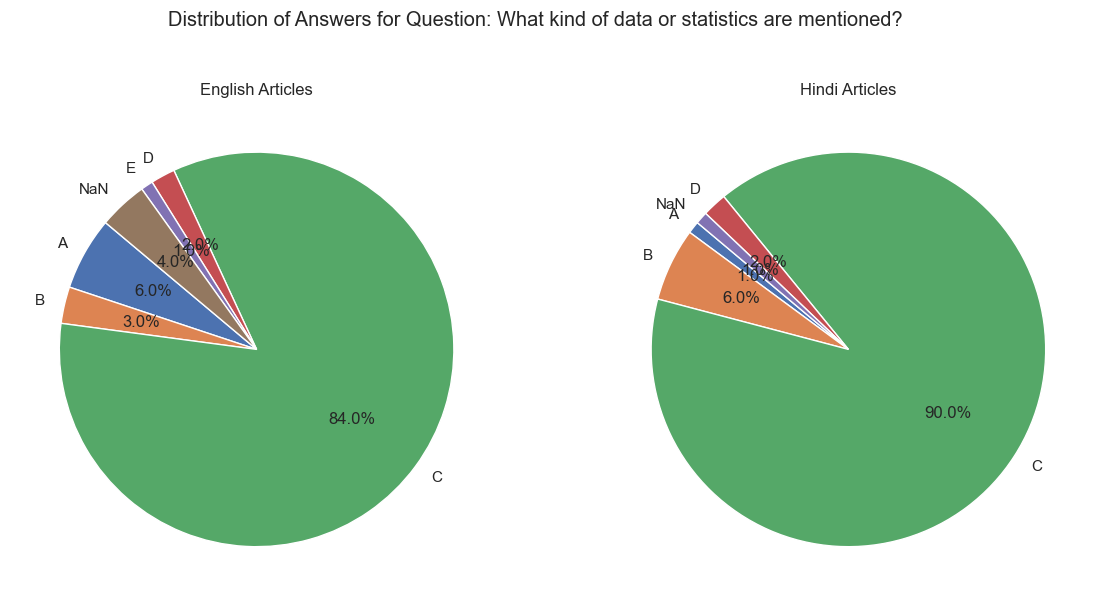

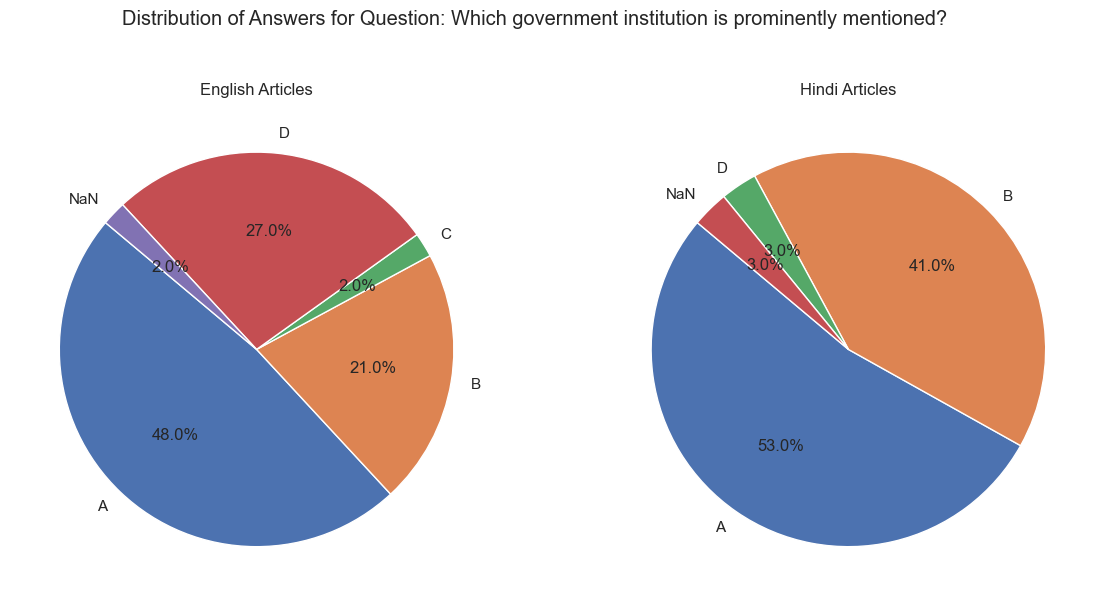

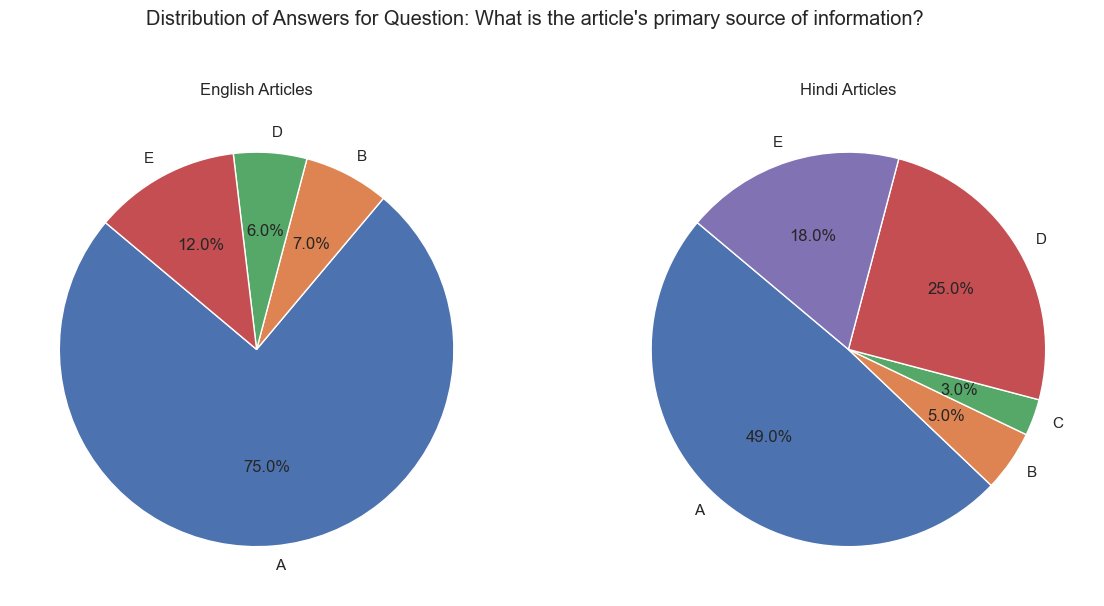

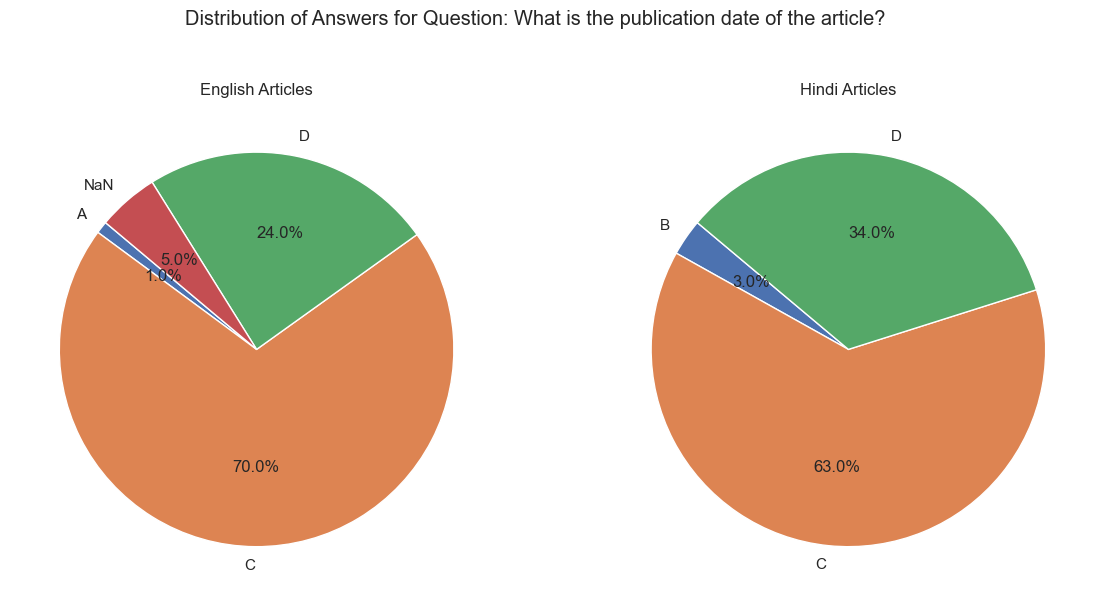

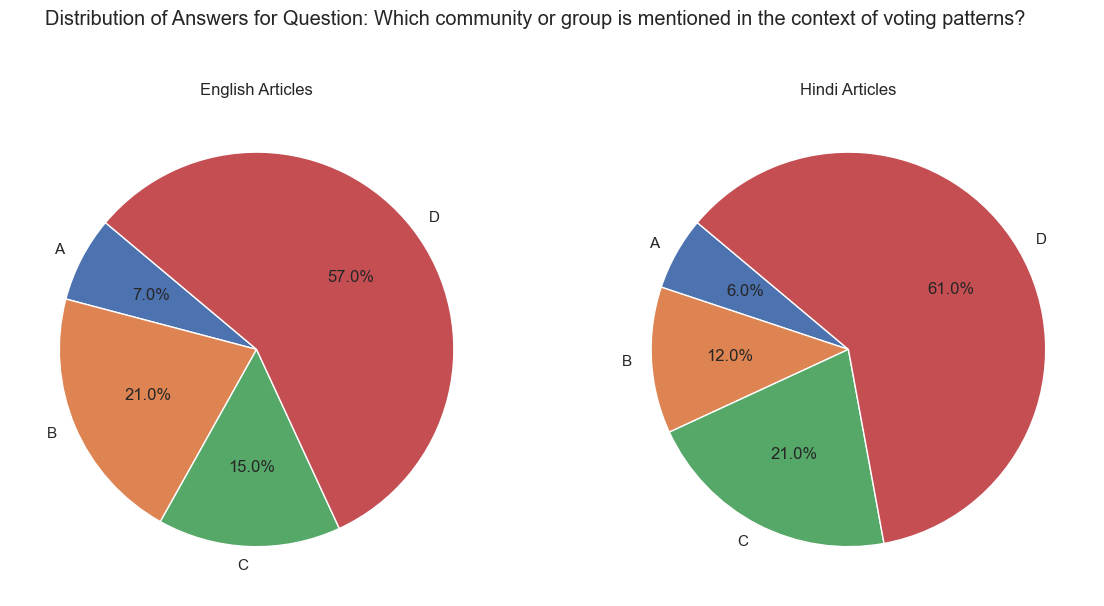

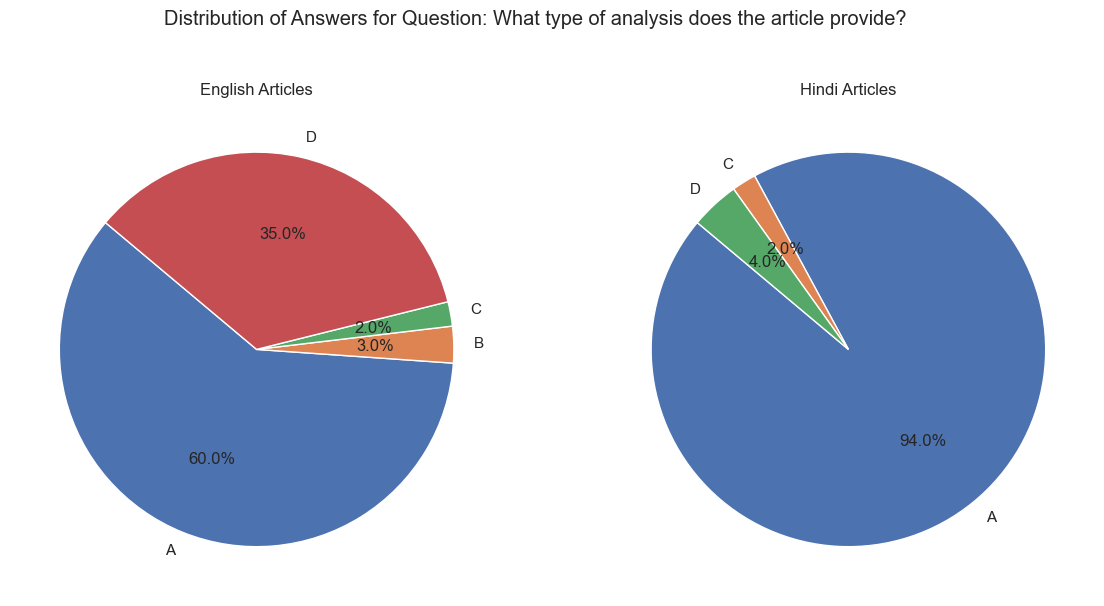

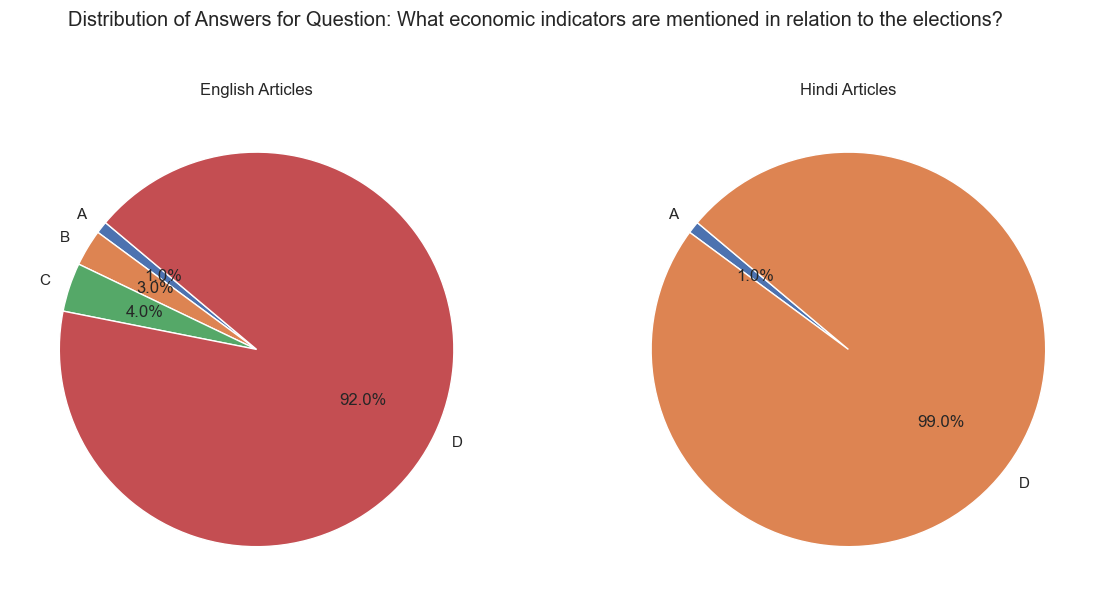

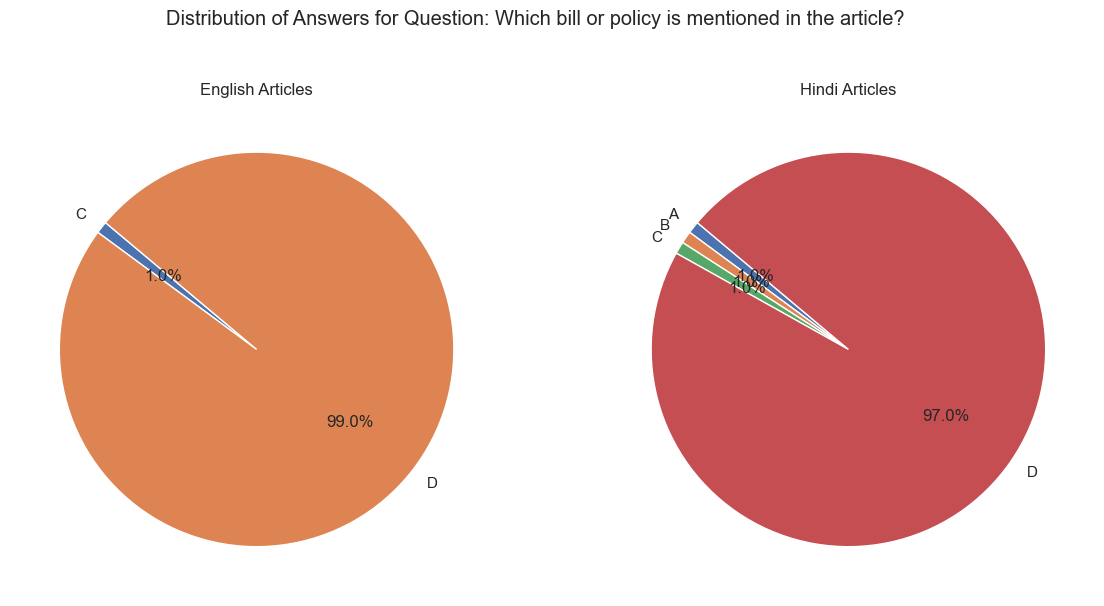

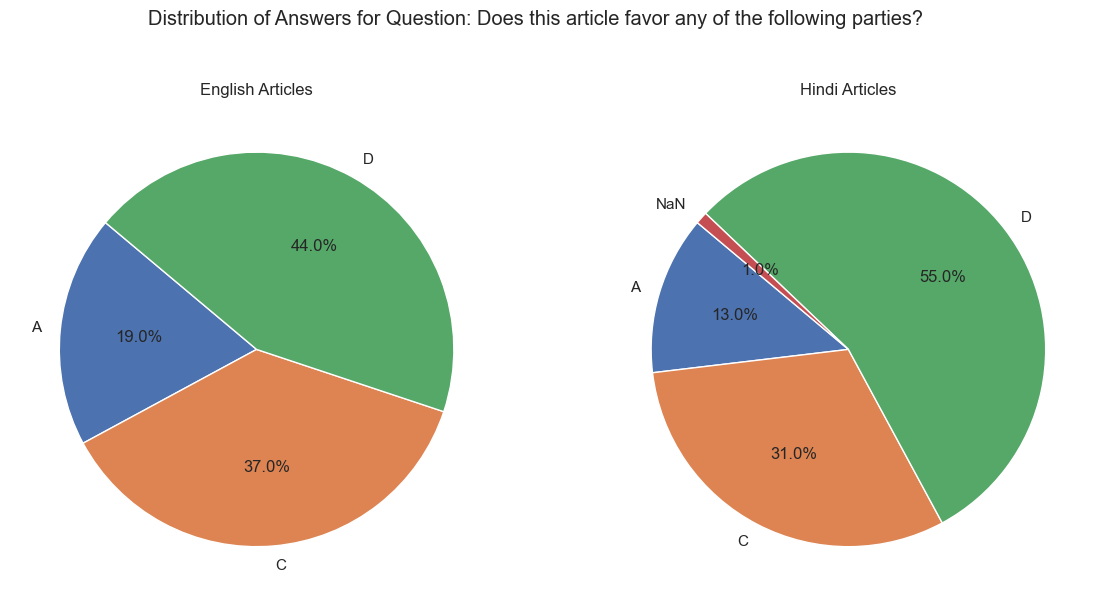

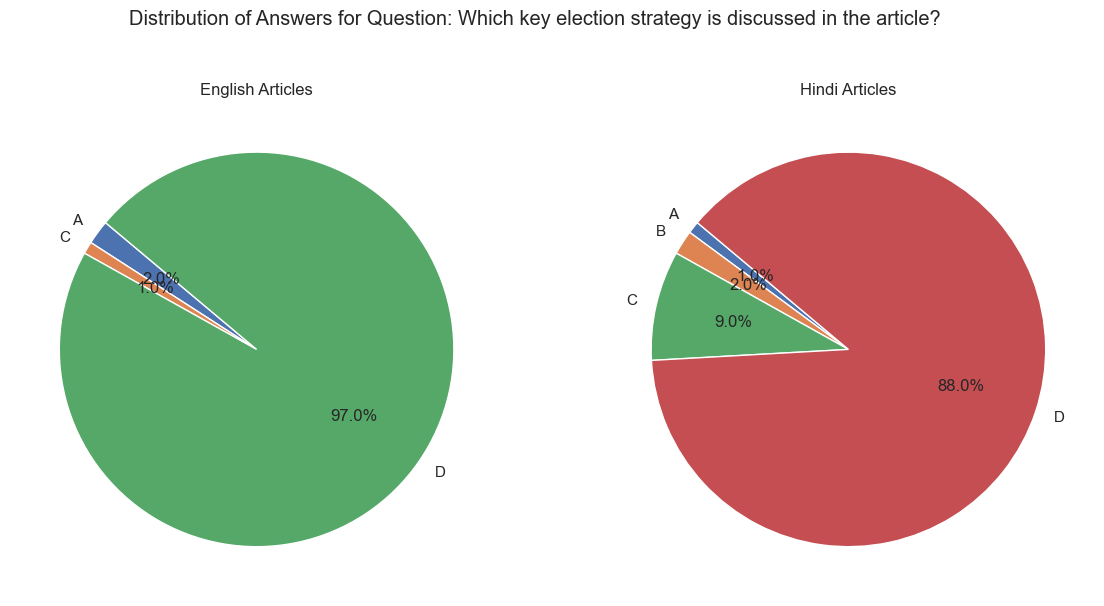

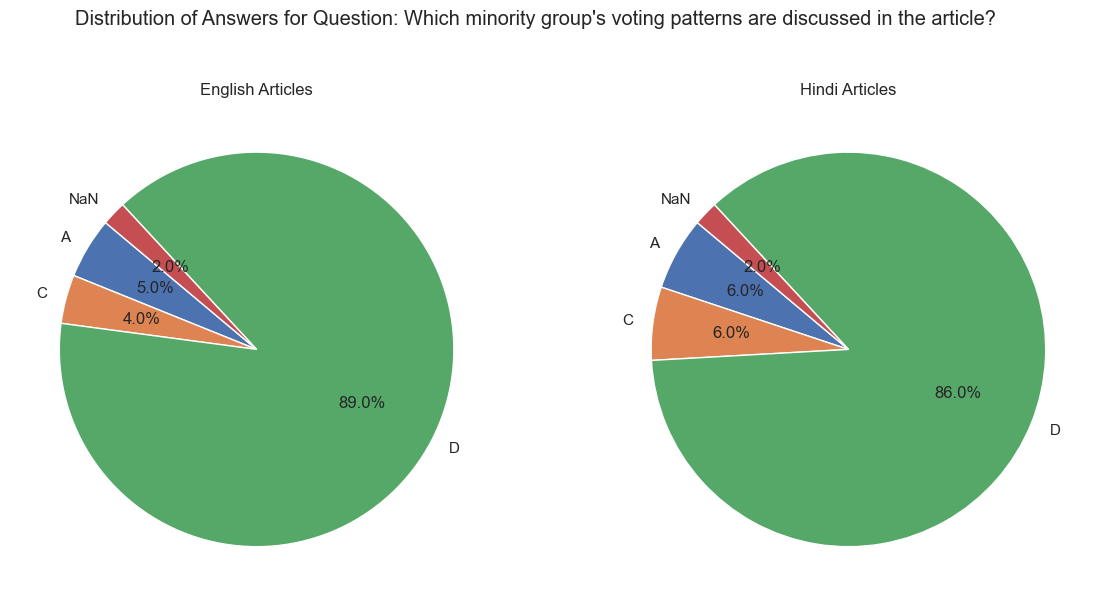

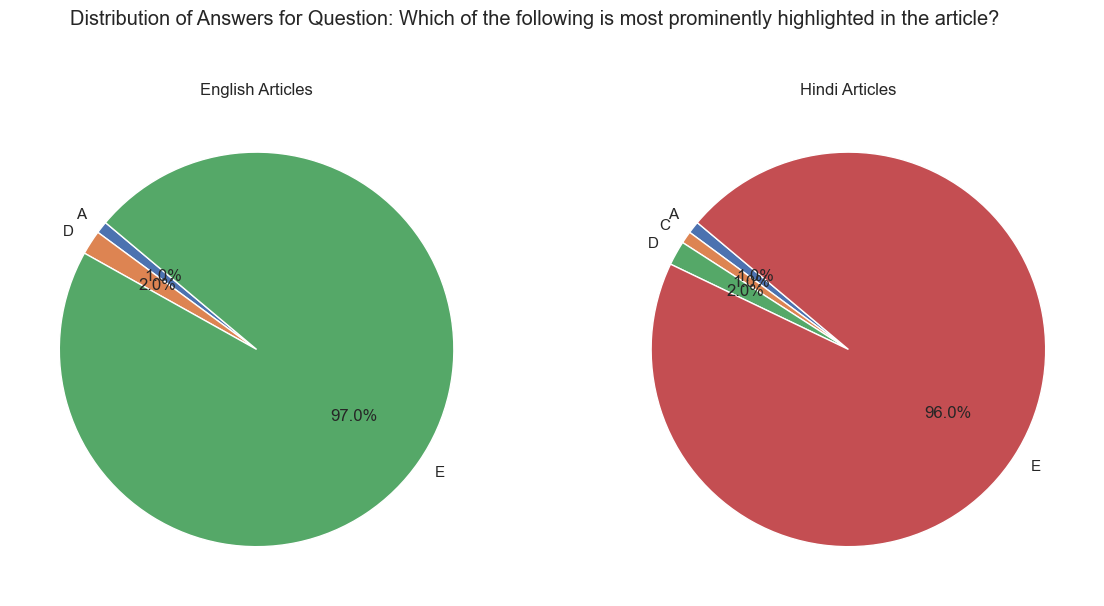

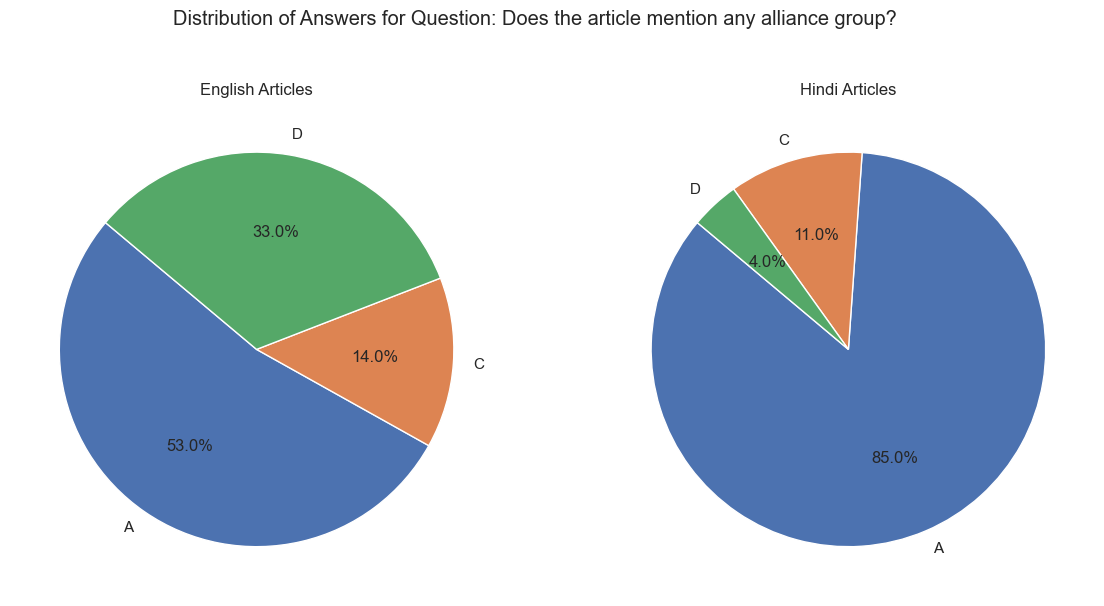

In [15]:
questions = df['Question'].unique()
for question in questions:
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle(f'Distribution of Answers for Question: {question}')

    # English articles
    eng_data = df[(df['Question'] == question) & (df['Language'] == 'English')].groupby('Answer').sum()['Count']
    ax[0].pie(eng_data, labels=eng_data.index, autopct='%1.1f%%', startangle=140)
    ax[0].set_title('English Articles')

    # Hindi articles
    hin_data = df[(df['Question'] == question) & (df['Language'] == 'Hindi')].groupby('Answer').sum()['Count']
    ax[1].pie(hin_data, labels=hin_data.index, autopct='%1.1f%%', startangle=140)
    ax[1].set_title('Hindi Articles')

    plt.show()


In [16]:
def compare_articles(english_article, hindi_article):
    matches = 0
    total_questions = len(english_article['QnA'])
    
    for eng_qna, hin_qna in zip(english_article['QnA'], hindi_article['QnA']):
        if eng_qna['post_LLM_answer'] == hin_qna['post_LLM_answer']:
            matches += 1
    
    return matches, total_questions

max_match_percentage = 0
best_match_pair = {}

for eng_article in english_articles:
    for hin_article in hindi_articles:
        matches, total_questions = compare_articles(eng_article, hin_article)
        match_percentage = (matches / total_questions) * 100
        if match_percentage > max_match_percentage:
            max_match_percentage = match_percentage
            best_match_pair = {
                'English_URI': eng_article['url'],
                'Hindi_URI': hin_article['url'],
                'Match_Percentage': match_percentage
            }

In [17]:
print(f"English Article URL: {best_match_pair['English_URI']}")
print(f"Hindi Article URL: {best_match_pair['Hindi_URI']}")
print(f"Match Percentage: {best_match_pair['Match_Percentage']:.2f}%")

English Article URL: https://www.latestly.com/agency-news/world-news-russian-president-putin-calls-pm-modi-congratulates-on-his-election-victory-6016571.html
Hindi Article URL: https://www.india.com/hindi-news/india-hindi/lok-sabha-election-result-2024-result-foreign-leaders-congratulate-pm-modi-for-getting-full-majority-6991546/
Match Percentage: 95.45%


In [21]:
def compare_articles(english_article, hindi_article):
    matches = 0
    total_questions = len(english_article['QnA'])
    
    for eng_qna, hin_qna in zip(english_article['QnA'], hindi_article['QnA']):
        if eng_qna['post_LLM_answer'] == hin_qna['post_LLM_answer']:
            matches += 1
    
    return matches, total_questions

max_match_percentage = 0
best_match_pair = {}

for eng_article in english_articles:
    for hin_article in hindi_articles:
        matches, total_questions = compare_articles(eng_article, hin_article)
        match_percentage = (matches / total_questions) * 100
        if match_percentage > max_match_percentage:
            max_match_percentage = match_percentage
            best_match_pair = {
                'English_URI': eng_article['url'],
                'Hindi_URI': hin_article['url'],
                'Match_Percentage': match_percentage,
                'English_Answers': ''.join([qna['post_LLM_answer'] for qna in eng_article['QnA']]),
                'Hindi_Answers': ''.join([qna['post_LLM_answer'] for qna in hin_article['QnA']])
            }

print(f"English Article URL: {best_match_pair['English_URI']}")
print(f"Hindi Article URL: {best_match_pair['Hindi_URI']}")
print(f"Match Percentage: {best_match_pair['Match_Percentage']:.2f}%")
print(f"\nEnglish Article Post LLM Answers: {best_match_pair['English_Answers']}")
print(f"Hindi Article Post LLM Answers: {best_match_pair['Hindi_Answers']}")



English Article URL: https://www.latestly.com/agency-news/world-news-russian-president-putin-calls-pm-modi-congratulates-on-his-election-victory-6016571.html
Hindi Article URL: https://www.india.com/hindi-news/india-hindi/lok-sabha-election-result-2024-result-foreign-leaders-congratulate-pm-modi-for-getting-full-majority-6991546/
Match Percentage: 95.45%

English Article Post LLM Answers: ADAAADCDCAACDDDDADDDEA
Hindi Article Post LLM Answers: ADAAADCNaNCAACDDDDADDDEA


In [39]:
def compare_articles(english_article, hindi_article):
    matches = 0
    total_questions = len(english_article['QnA'])
    
    for eng_qna, hin_qna in zip(english_article['QnA'], hindi_article['QnA']):
        if eng_qna['post_LLM_answer'] == hin_qna['post_LLM_answer']:
            matches += 1
    
    return matches, total_questions

max_match_percentage = 0
min_match_percentage = 100
best_match_pair = {}
worst_match_pair = {}

for eng_article in english_articles:
    for hin_article in hindi_articles:
        matches, total_questions = compare_articles(eng_article, hin_article)
        match_percentage = (matches / total_questions) * 100
        if match_percentage > max_match_percentage:
            max_match_percentage = match_percentage
            best_match_pair = {
                'English_URI': eng_article['url'],
                'Hindi_URI': hin_article['url'],
                'Match_Percentage': match_percentage,
                'English_Answers': ''.join([qna['post_LLM_answer'] for qna in eng_article['QnA']]),
                'Hindi_Answers': ''.join([qna['post_LLM_answer'] for qna in hin_article['QnA']])
            }
        if match_percentage < min_match_percentage:
            min_match_percentage = match_percentage
            worst_match_pair = {
                'English_URI': eng_article['url'],
                'Hindi_URI': hin_article['url'],
                'Match_Percentage': match_percentage,
                'English_Answers': ''.join([qna['post_LLM_answer'] for qna in eng_article['QnA']]),
                'Hindi_Answers': ''.join([qna['post_LLM_answer'] for qna in hin_article['QnA']])
            }

print("Best Match Pair:")
print(f"English Article URL: {best_match_pair['English_URI']}")
print(f"Hindi Article URL: {best_match_pair['Hindi_URI']}")
print(f"Match Percentage: {best_match_pair['Match_Percentage']:.2f}%")
print(f"\nEnglish Article Post LLM Answers: {best_match_pair['English_Answers']}")
print(f"Hindi Article Post LLM Answers: {best_match_pair['Hindi_Answers']}")

print("\nWorst Match Pair:")
print(f"English Article URL: {worst_match_pair['English_URI']}")
print(f"Hindi Article URL: {worst_match_pair['Hindi_URI']}")
print(f"Match Percentage: {worst_match_pair['Match_Percentage']:.2f}%")
print(f"\nEnglish Article Post LLM Answers: {worst_match_pair['English_Answers']}")
print(f"Hindi Article Post LLM Answers: {worst_match_pair['Hindi_Answers']}")


Best Match Pair:
English Article URL: https://www.latestly.com/agency-news/world-news-russian-president-putin-calls-pm-modi-congratulates-on-his-election-victory-6016571.html
Hindi Article URL: https://www.india.com/hindi-news/india-hindi/lok-sabha-election-result-2024-result-foreign-leaders-congratulate-pm-modi-for-getting-full-majority-6991546/
Match Percentage: 95.45%

English Article Post LLM Answers: ADAAADCDCAACDDDDADDDEA
Hindi Article Post LLM Answers: ADAAADCNaNCAACDDDDADDDEA

Worst Match Pair:
English Article URL: https://www.latestly.com/agency-news/india-news-pune-car-crash-teens-parents-accused-for-blood-sample-manipulations-sent-to-police-custody-till-june-10-6016524.html
Hindi Article URL: https://www.thelallantop.com/election/post/wayanad-lok-sabha-election-2024-result-rahul-gandhi-k-surendran-annie-raja
Match Percentage: 18.18%

English Article Post LLM Answers: EBADDDEACDANaNBDDDDDDDAD
Hindi Article Post LLM Answers: ACABBACDCADDAADACDAAEA
